## Questão 1

Esta etapa se baseia na análise de algumas variáveis e na resposta de algumas questões de negócio que foram solicitadas.

In [1]:
## Importando as bibliotecas necessárias

import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
base1 = pd.read_csv('../Questão 1 - Base.txt', sep="\t")

In [3]:
# Verificando se há valores faltantes

print(base1.isnull().values.any())
print(base1.isna().values.any())

False
False


In [4]:
base1.head()

,ID_CONTA,DT_VENCIMENTO,DS_ROLAGEM,VL_FATURA
0,402467,2019-01-01,FX0,210.00
1,403001,2019-01-01,FX1,1097.18
2,403499,2019-01-01,FX0,1209.88
3,403670,2019-01-01,FX0,667.40
4,404183,2019-01-01,FX1,1239.52


A base é composta por 4 colunas relacionadas a faturas de clientes, e possui mais de 2 milhões de linhas.

### 1.1 Qual o percentual de faturas emitidas por mês no qual os clientes não pagaram a fatura anterior? 

Primeiro, será necessário criar uma coluna de mês para facilitar os cálculos. Depois, criar uma nova tabela com a quantidade de faturas por mês.


In [5]:
base1['DATA']= pd.to_datetime(base1['DT_VENCIMENTO'])
base1['DT_MES']= base1['DATA'].dt.month

# Filtrando apenas quem não pagou a fatura do mês anterior

base1_FX1 = base1[base1.DS_ROLAGEM == 'FX1']
base1_FX1_gr = base1_FX1.groupby(['DT_MES']).count()
base1_FX1_gr = base1_FX1_gr.add_suffix('').reset_index()
base1_FX1_gr = base1_FX1_gr[['DT_MES','ID_CONTA']]

base1_FX1_gr.rename(columns={'ID_CONTA': 'QTD_FATURA_FX1'}, inplace = True)

In [6]:
# Agrupando a base inicial
base1_gr = base1.groupby(['DT_MES']).count()
base1_gr = base1_gr.add_suffix('').reset_index()
base1_gr = base1_gr[['DT_MES','ID_CONTA']]

base1_gr.rename(columns={'ID_CONTA': 'QTD_FATURA_TOTAL'}, inplace = True)

base1_resumo = pd.merge(base1_FX1_gr, base1_gr, how='left', on=['DT_MES'])
base1_resumo['PERCENT'] = round(base1_resumo.QTD_FATURA_FX1/base1_resumo.QTD_FATURA_TOTAL,2)*100

In [7]:
base1_resumo

,DT_MES,QTD_FATURA_FX1,QTD_FATURA_TOTAL,PERCENT
0,1,22835,313383,7.0
1,2,27928,313849,9.0
2,3,33432,307318,11.0
3,4,25380,302330,8.0
4,5,30321,301865,10.0
5,6,25977,304366,9.0
6,7,29889,310894,10.0
7,8,28736,317067,9.0
8,9,21955,257177,9.0


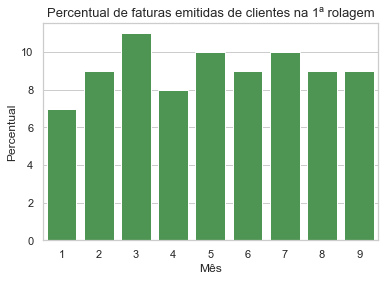

In [8]:
# Gráfico do percentual

sns.set_theme(style="whitegrid")
sns.barplot(x='DT_MES', y='PERCENT', data = base1_resumo, color = "#439F48")
plt.title("Percentual de faturas emitidas de clientes na 1ª rolagem", fontdict={'fontsize':13})
plt.xlabel('Mês')
plt.ylabel('Percentual')
plt.show()

Pela tabela e gráfico acima, podemos observar, nos clientes que estão na 1ª rolagem, que o mês com mais faturas emitidas foi março com 11% e o menor foi janeiro com 7%. (Levando em consideração que o mês de emissão é o mesmo do vencimento)

Algo que é interessante observar e pode ser levado em consideração, é que os clientes conseguem pagar mais as faturas do fim de ano (refletido no percentual de janeiro) do que as faturas 'do carnaval' (refletido no percentual de março). Uma variável que poderia influenciar isso é o recebimento do 13° salário.

### 1.2 Faturas emitidas no mês de setembro

In [9]:
# Separando as contas
base1_2 = base1[base1.DT_MES == 9]
conta_set = base1_2.ID_CONTA.drop_duplicates()

In [10]:
# Filtrando os 6 meses
meses = [3,4,5,6,7,8]
base1_2_ = base1[base1.DT_MES.isin(meses)]
base1_2_ = base1_2_[base1_2_.ID_CONTA.isin(conta_set)]

In [11]:
# Total de faturas emitidas nos últimos 6 meses
base1_2_gr = base1_2_.groupby(['ID_CONTA']).count()
base1_2_gr = base1_2_gr.add_suffix('').reset_index()
base1_2_gr = base1_2_gr[['ID_CONTA','DT_VENCIMENTO']]
base1_2_gr.rename(columns={'DT_VENCIMENTO': 'QTD_FATURAS_ULT_6M'}, inplace = True)

In [12]:
# Valor médio de fatura por conta
base1_2_gr2 = base1_2_.groupby(['ID_CONTA']).mean()
base1_2_gr2 = base1_2_gr2.add_suffix('').reset_index()
base1_2_gr2 = base1_2_gr2[['ID_CONTA','VL_FATURA']]
base1_2_gr2.rename(columns={'VL_FATURA': 'VL_MEDIO_FATURA'}, inplace = True)

In [13]:
# Não pagou a fatura anterior
base1_2_gr3 = base1_2_[base1_2_.DS_ROLAGEM == 'FX1']
base1_2_gr3 = base1_2_gr3.groupby(['ID_CONTA']).count()
base1_2_gr3 = base1_2_gr3.add_suffix('').reset_index()
base1_2_gr3 = base1_2_gr3[['ID_CONTA','DS_ROLAGEM']]
base1_2_gr3.rename(columns={'DS_ROLAGEM': 'QTD_FATURAS_ULT_6M_FX1'}, inplace = True)

In [14]:
# Agrupando todas as bases anteriores
base1_2_R = base1_2.drop(['DATA','DT_MES','VL_FATURA'], axis=1)
base1_2_set = pd.merge(base1_2_R, base1_2_gr, how='left', on=['ID_CONTA'])
base1_2_set = pd.merge(base1_2_set, base1_2_gr2, how='left', on=['ID_CONTA'])
base1_2_set = pd.merge(base1_2_set, base1_2_gr3, how='left', on=['ID_CONTA'])

In [15]:
# Fazendo alguns ajustes na base final
base1_2_set.VL_MEDIO_FATURA = base1_2_set.VL_MEDIO_FATURA.apply(lambda x: round(x,2))
base1_2_set = base1_2_set.fillna(0)
base1_2_set.QTD_FATURAS_ULT_6M = base1_2_set.QTD_FATURAS_ULT_6M.apply(lambda x: int(x))
base1_2_set.QTD_FATURAS_ULT_6M_FX1 = base1_2_set.QTD_FATURAS_ULT_6M_FX1.apply(lambda x: int(x))

In [16]:
base1_2_set

,ID_CONTA,DT_VENCIMENTO,DS_ROLAGEM,QTD_FATURAS_ULT_6M,VL_MEDIO_FATURA,QTD_FATURAS_ULT_6M_FX1
0,99416,2019-09-01,FX0,6,2791.62,0
1,52706,2019-09-01,FX0,6,309.64,0
2,1024221,2019-09-01,FX0,6,295.18,0
3,1024238,2019-09-01,FX0,6,870.56,0
4,1024293,2019-09-01,FX0,6,1646.75,0
...,...,...,...,...,...,...
257172,1751997,2019-09-23,FX0,0,0.00,0
257173,1752023,2019-09-23,FX0,0,0.00,0
257174,1752049,2019-09-23,FX0,0,0.00,0
257175,1752120,2019-09-23,FX0,0,0.00,0


O percentual de clientes com fatura em setembro que estão na primeira rolagem é de 8,54%

In [17]:
print("% de clientes FX0: ", round(len(base1_2_set[base1_2_set.DS_ROLAGEM == 'FX0'])/len(base1_2_set) *100, 2))
print("% de clientes FX1: ",round(len(base1_2_set[base1_2_set.DS_ROLAGEM == 'FX1'])/len(base1_2_set) *100, 2))

% de clientes FX0:  91.46
% de clientes FX1:  8.54


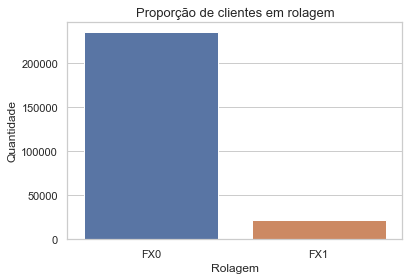

In [18]:
sns.set_theme(style="whitegrid")
sns.countplot(x='DS_ROLAGEM',data=base1_2_set)
plt.title("Proporção de clientes em rolagem", fontdict={'fontsize':13})
plt.xlabel('Rolagem')
plt.ylabel('Quantidade')
plt.show()

### 1.3 Relação das variáveis calculadas com a rolagem

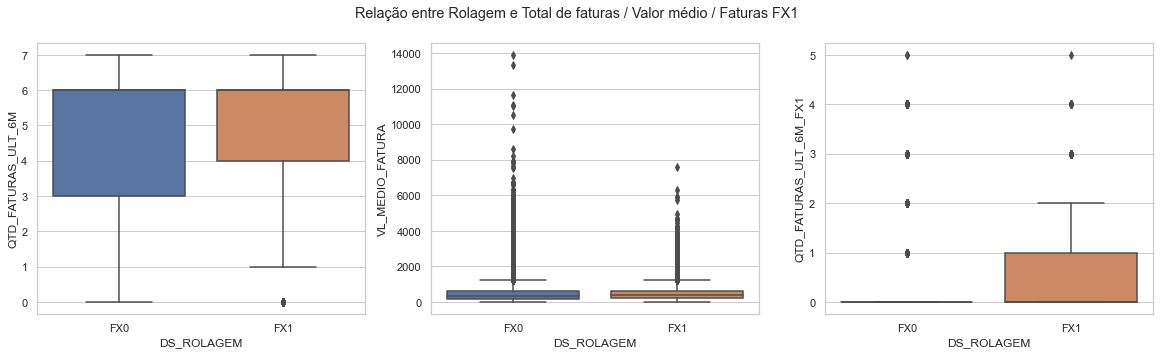

In [19]:
fig, axes = plt.subplots(1, 3, figsize=(20, 5), sharey=False)
fig.suptitle('Relação entre Rolagem e Total de faturas / Valor médio / Faturas FX1', fontdict={'fontsize':15})

sns.boxplot(y='QTD_FATURAS_ULT_6M', x='DS_ROLAGEM', data = base1_2_set, ax=axes[0])
sns.boxplot(y='VL_MEDIO_FATURA', x='DS_ROLAGEM', data = base1_2_set, ax=axes[1])
sns.boxplot(y='QTD_FATURAS_ULT_6M_FX1', x='DS_ROLAGEM', data = base1_2_set, ax=axes[2])

plt.show()

Verificando os 3 gráficos acima percebemos que a variável QTD_FATURAS_ULT_6M_FX1 possui a maior diferença com relação a rolagem de setembro, indicando que impacta mais na variável DS_ROLAGEM. 50% dos clientes que estão em rolagem no mês de setembro já possuiram algum débito em outras faturas.
Em seguida temos o total de faturas dos últimos 6 meses indicando que quanto menos faturas o cliente possui nesse intervalo, menor é a chance de inadimplencia em setembro.